In [60]:
import pandas as pd
import numpy as np
facil = pd.read_csv("facilities.csv")

Importing pandas and data set

In [61]:
facil.head()

,id,parcel_id,inactive,name,rentable,type,primary_user,address_number,street,zip,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,650726265,120-J-300,f,57th Street Park Building,f,Storage,Department of Public Works,NaN,57TH ST,NaN,...,Upper Lawrenceville,7,10.0,42003101100,2.0,10.0,2.0,3-5,40.485658,-79.946446
1,783044037,2-H-284,f,Albert Turk Graham Park Shelter,f,Shelter,Department of Public Works,39.0,VINE ST,NaN,...,Crawford-Roberts,6,3.0,42003030500,3.0,3.0,2.0,2-1,40.440464,-79.984103
2,1997158435,23-R-157,f,Allegheny Northside Senior Center and Hazlett ...,t,Senior,CitiParks,5.0,ALLEGHENY SQ E,15212.0,...,Allegheny Center,1,22.0,42003562700,1.0,22.0,1.0,1-6,40.453091,-80.005339
3,204824684,10-F-198,f,Ammon Recreation Center,f,Pool,CitiParks,2217.0,BEDFORD AVE,15219.0,...,Bedford Dwellings,6,5.0,42003050900,3.0,5.0,2.0,2-5,40.448727,-79.977853
4,472140955,013-K-314,f,Arlington Field Lights Building,f,Utility,CitiParks,0.0,STERLING ST,15210.0,...,South Side Slopes,3,16.0,42003160800,3.0,16.0,3.0,4-22,40.418144,-79.974468


look at some data, verify it works

In [62]:
all_neighborhoods = facil['neighborhood'].value_counts()
all_neighborhoods

Highland Park          30
Squirrel Hill South    29
Perry North            20
Brookline              19
Strip District         15
                       ..
Upper Lawrenceville     1
Bon Air                 1
Central Northside       1
Fairywood               1
West Oakland            1
Name: neighborhood, Length: 75, dtype: int64

See which neighborhood has most entries in dataset. We can see that we have lots of neighborhoods (75) in the set.
Now lets check out the types of each facility.

In [63]:
types = facil['type'].str.lower().value_counts()
types

shelter          62
dugout           42
concession       32
service          30
storage          30
firehouse        28
pool             25
office           24
utility          19
restrooms        18
activity         18
senior           16
police           15
medic station    11
salt dome         8
rec center        6
pool/rec          6
pool closed       4
cabin             4
training          4
community         3
recycling         3
vacant            1
Name: type, dtype: int64

Used method to make all types the same case, as the case varys in the data frame.

<AxesSubplot:>

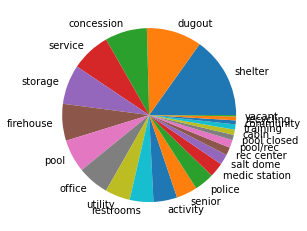

In [64]:
types.plot(kind="pie", label="")

Graphical Distribution of Facility Types


Lets now get back to how many facilities are in each neighborhood

<AxesSubplot:>

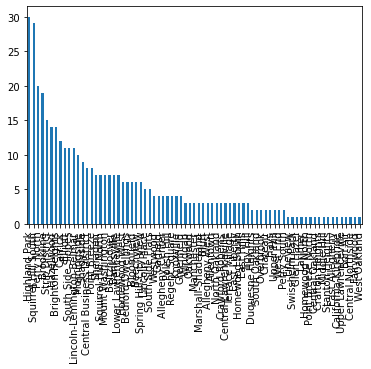

In [54]:
all_neighborhoods.plot.bar(x='neighborhood')

The data is all very smushed. Given how many neighborhoods have very little facilities, lets just look at the top 10:

In [55]:
top_10 = facil['neighborhood'].value_counts().head(10)
top_10

Highland Park          30
Squirrel Hill South    29
Perry North            20
Brookline              19
Strip District         15
Hazelwood              14
Brighton Heights       14
Carrick                12
Elliott                11
South Side Slopes      11
Name: neighborhood, dtype: int64

<AxesSubplot:>

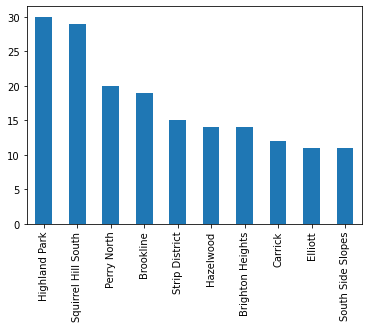

In [56]:
top_10.plot.bar(x='neighborhood')

Much clearer, and now we can focus on what neighborhood has the most facilities

It is very close between Highland Park (30) and Squirrel Hill South (29). Lets look at their distributions of facilities.

<AxesSubplot:>

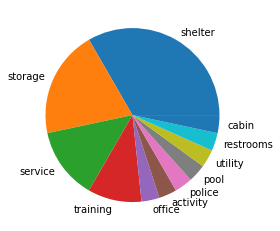

In [78]:
query_mask = facil['neighborhood'] == "Highland Park"
h = facil[query_mask]
p = h['type'].str.lower().value_counts()
p.plot(kind="pie", label="")

<AxesSubplot:>

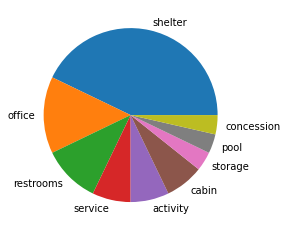

In [79]:
query_mask = facil['neighborhood'] == "Squirrel Hill South"
h = facil[query_mask]
p = h['type'].str.lower().value_counts()
p.plot(kind="pie", label="")

Highland Park has a more even distribution of facilities, as well as more facilities in general. Thus:

### The best neighborhood in regards to access to and distribution of facilities is:

# Highland Park